In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Bike_sharing_demand.csv')

df = df.drop(['casual', 'registered'], axis=1) 
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


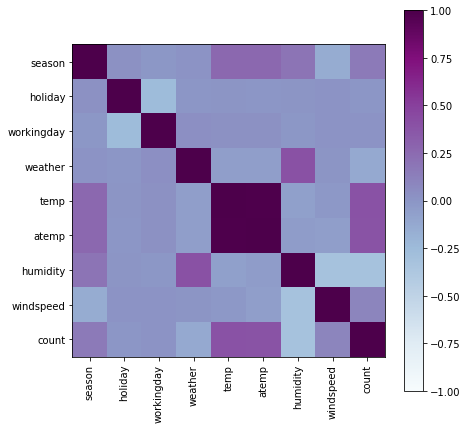

In [2]:
#визуализация общей корреляции признаков

corr = df.corr()

def corr_plot(data):
    
    labels = [c for c in data.columns]
    fig, ax = plt.subplots(figsize=(7, 7))
    
    plt.xticks(rotation=90)
    
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticks(np.arange(len(labels)))
    
    ax.set_yticklabels(labels)
    ax.set_xticklabels(labels)
    
    plt.imshow(data, cmap='BuPu', vmin=-1, vmax=1)
    plt.colorbar();
    
corr_plot(corr)

In [ ]:
#пока не работает и вообще лучше не запускать, а то все умирает
features = [c for c in df.columns[:-1]]

for feature in features:
    
    plt.plot(df[feature], df['count'], marker='.', linestyle='none') 
    plt.tight_layout()

In [3]:
count_corr = df.corr().filter(['count']).drop(['count']) #корреляция всех признаков с Count
count_corr.sort_values(['count'])

,count
humidity,-0.317371
weather,-0.128655
holiday,-0.005393
workingday,0.011594
windspeed,0.101369
season,0.163439
atemp,0.389784
temp,0.394454


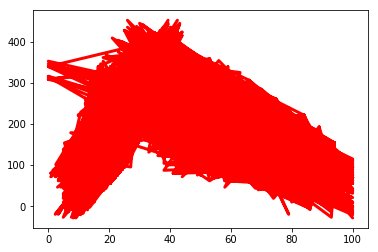

In [5]:
#выделение 3 наиболее коллинеарных признаков и отображение линейной регрессии

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df[['humidity', 'temp', 'atemp']]
y = df['count']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(x_train, y_train)

plt.plot(x_test, lm.predict(x_test), color='red', linewidth=3)
plt.show()  #смешной результат, что-то тут явно не так...